<h1>逻辑回归制作评分卡<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导库，获取数据" data-toc-modified-id="导库，获取数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导库，获取数据</a></span></li><li><span><a href="#探索数据与数据预处理" data-toc-modified-id="探索数据与数据预处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>探索数据与数据预处理</a></span><ul class="toc-item"><li><span><a href="#去除重复值" data-toc-modified-id="去除重复值-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>去除重复值</a></span></li><li><span><a href="#填补缺失值" data-toc-modified-id="填补缺失值-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>填补缺失值</a></span></li><li><span><a href="#描述性统计处理异常值" data-toc-modified-id="描述性统计处理异常值-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>描述性统计处理异常值</a></span></li><li><span><a href="#为什么不统一量纲，也不标准化数据分布？" data-toc-modified-id="为什么不统一量纲，也不标准化数据分布？-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>为什么不统一量纲，也不标准化数据分布？</a></span></li><li><span><a href="#样本不均衡问题" data-toc-modified-id="样本不均衡问题-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>样本不均衡问题</a></span></li><li><span><a href="#分训练集和测试集" data-toc-modified-id="分训练集和测试集-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>分训练集和测试集</a></span></li></ul></li><li><span><a href="#分箱" data-toc-modified-id="分箱-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>分箱</a></span><ul class="toc-item"><li><span><a href="#等频分箱" data-toc-modified-id="等频分箱-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>等频分箱</a></span></li><li><span><a href="#确保每个箱子中都有0和1" data-toc-modified-id="确保每个箱子中都有0和1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>确保每个箱子中都有0和1</a></span></li><li><span><a href="#定义WOE和IV函数" data-toc-modified-id="定义WOE和IV函数-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>定义WOE和IV函数</a></span></li><li><span><a href="#卡方检验，合并箱体，画出IV曲线" data-toc-modified-id="卡方检验，合并箱体，画出IV曲线-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>卡方检验，合并箱体，画出IV曲线</a></span></li><li><span><a href="#用最佳分箱个数分箱，并验证分箱结果" data-toc-modified-id="用最佳分箱个数分箱，并验证分箱结果-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>用最佳分箱个数分箱，并验证分箱结果</a></span></li><li><span><a href="#将选取最佳分箱个数的过程包装为函数" data-toc-modified-id="将选取最佳分箱个数的过程包装为函数-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>将选取最佳分箱个数的过程包装为函数</a></span></li><li><span><a href="#对所有特征进行分箱选择" data-toc-modified-id="对所有特征进行分箱选择-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>对所有特征进行分箱选择</a></span></li></ul></li><li><span><a href="#计算各箱的WOE并映射到数据中" data-toc-modified-id="计算各箱的WOE并映射到数据中-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>计算各箱的WOE并映射到数据中</a></span></li><li><span><a href="#建模与模型验证" data-toc-modified-id="建模与模型验证-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>建模与模型验证</a></span></li><li><span><a href="#制作评分卡" data-toc-modified-id="制作评分卡-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>制作评分卡</a></span></li></ul></div>

执行流程：<br>
1、获取数据<br>
2、数据清洗，特征工程<br>
3、模型开发<br>
4、模型检测与评估<br>
5、模型上线<br>
6、监测与报告<br>

# 导库，获取数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv("rankingcard.csv",index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 探索数据与数据预处理

SeriousDlqin2yrs 出现 90 天或更长时间的逾期行为（即定义好坏客户）<br>
RevolvingUtilizationOfUnsecuredLines 贷款以及信用卡可用额度与总额度比例<br>
age 借款人借款年龄<br>
NumberOfTime30-59DaysPastDueNotWorse 过去两年内出现35-59天逾期但是没有发展得更坏的次数<br>
DebtRatio 每月偿还债务，赡养费，生活费用除以月总收入<br>
MonthlyIncome 月收入<br>
NumberOfOpenCreditLinesAndLoans 开放式贷款和信贷数量<br>
NumberOfTimes90DaysLate 过去两年内出现90天逾期或更坏的次数<br>
NumberRealEstateLoansOrLines 抵押贷款和房地产贷款数量，包括房屋净值信贷额度<br>
NumberOfTime60-89DaysPastDueNotWorse 过去两年内出现60-89天逾期但是没有发展得更坏的次数<br>
NumberOfDependents 家庭中不包括自身的家属人数（配偶，子女等）<br>

In [3]:
# 查看数据结构
data.shape

(150000, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

我们发现数据中有缺失值，需要对数据进行预处理

## 去除重复值

In [7]:
# 去除重复值，参数inpace = True：替换原来的data
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [10]:
# 更新索引值
data.index = range(0,data.shape[0])

## 填补缺失值

In [11]:
# 查看特征缺失值的比例
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [13]:
# 填补家庭成员的缺失值
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

In [14]:
# 查看填补缺失值后特征缺失值的比例
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

那字段"收入"怎么办呢？对于银行数据来说，我们甚至可以有这样的推断：一个来借钱的人应该是会知道，“高收
入”或者“稳定收入”于他/她自己而言会是申请贷款过程中的一个助力，因此如果收入稳定良好的人，肯定会倾向于
写上自己的收入情况，那么这些“收入”栏缺失的人，更可能是收入状况不稳定或收入比较低的人。基于这种判断，
我们可以用比如说，四分位数来填补缺失值，把所有收入为空的客户都当成是低收入人群。当然了，也有可能这些
缺失是银行数据收集过程中的失误，我们并无法判断为什么收入栏会有缺失，所以我们的推断也有可能是不正确
的。具体采用什么样的手段填补缺失值，要和业务人员去沟通，观察缺失值是如何产生的。在这里，我们使用随机
森林填补“收入”。

特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train 特征T不缺失的值：Y_train 特征T缺失的值对应的其
他n-1个特征 + 本来的标签：X_test 特征T缺失的值：未知，我们需要预测的Y_test

In [15]:
def fill_missing_rf(X,y,to_fill):
    """
   使用随机森林填补一个特征的缺失值的函数
   参数：
   X：要填补的特征矩阵
   y：完整的，没有缺失值的标签
   to_fill：字符串，要填补的那一列的名称
   """
    
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]    #特征非空的那一列
    Ytest = fill[fill.isnull()]      #特征为空的那一列
    Xtrain = df.iloc[Ytrain.index,:] #特征为非空那一列对应的一整行
    Xtest = df.iloc[Ytest.index,:]   #特征为空那一列对应的一整行
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [18]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149386,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149387,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149388,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149389,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [17]:
#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
y_pred

F:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([0.25, 0.22, 0.13, ..., 0.24, 0.16, 0.  ])

In [19]:
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

## 描述性统计处理异常值

日常处理异常值，我们使用箱线图或者3$\sigma$法则来找到异常值

In [22]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5423.489279,13231.897776,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [23]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [24]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [25]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"

这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [26]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1535.770469,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2200.730000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2099.320143,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,8.100000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,480.010000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [27]:
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基本可以判断，这些样本是某种异常，应该把它们删除。
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]

In [28]:
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

## 为什么不统一量纲，也不标准化数据分布？

在描述性统计结果中，我们可以观察到数据量纲明显不统一，而且存在一部分极偏的分布，虽然逻辑回归对于数据
没有分布要求，但是我们知道如果数据服从正态分布的话梯度下降可以收敛得更快。但在这里，我们不对数据进行
标准化处理，也不进行量纲统一，为什么？

无论算法有什么样的规定，无论统计学中有什么样的要求，我们的最终目的都是要为业务服务。现在我们要制作评
分卡，评分卡是要给业务人员们使用的基于新客户填写的各种信息为客户打分的一张卡片，而为了制作这张卡片，
我们需要对我们的数据进行一个“分档”，比如说，年龄20~30岁为一档，年龄30~50岁为一档，月收入1W以上为一
档，5000~1W为一档，每档的分数不同。

一旦我们将数据统一量纲，或者标准化了之后，数据大小和范围都会改变，统计结果是漂亮了，但是对于业务人员
来说，他们完全无法理解，标准化后的年龄在0.00328-0.00467之间为一档是什么含义。并且，新客户填写的信
息，天生就是量纲不统一的，我们的确可以将所有的信息录入之后，统一进行标准化，然后导入算法计算，但是最
终落到业务人员手上去判断的时候，他们会完全不理解为什么录入的信息变成了一串统计上很美但实际上根本看不
懂的数字。由于业务要求，在制作评分卡的时候，我们要尽量保持数据的原貌，年龄就是8-110的数字，收入就是
大于0，最大值可以无限的数字，即便量纲不统一，我们也不对数据进行标准化处理。

## 样本不均衡问题

好用户和坏用户的样本数量不均衡

In [30]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [31]:
# 是否为好客户
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [33]:
n_sample = X.shape[0]
n_sample

149165

In [35]:
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占6.62%; 0占93.38%


In [36]:
#如果报错，就在prompt安装：pip install imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
import imblearn

F:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y) #返回已经上采样完毕之后的特征矩阵和标签

In [38]:
n_sample_ = X.shape[0]
pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [39]:
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584; 1占50.00%; 0占50.00%


## 分训练集和测试集

In [40]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [41]:
# 分测试集和训练集
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

In [42]:
model_data = pd.concat([Y_train, X_train], axis=1)
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
81602,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000
149043,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
215073,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057
66278,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000
157084,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
178094,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830
62239,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
152127,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793
119174,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000


In [44]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [43]:
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
54665,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
165769,1,0.478906,39,0,0.181301,29373.217358,11,0,2,0,3.000000
72364,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
145813,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
154632,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706
...,...,...,...,...,...,...,...,...,...,...,...
193024,1,1.161976,47,0,9.028680,1412.207070,0,0,0,0,0.000000
246642,1,0.865386,40,2,0.460507,3900.000000,11,0,0,0,4.592942
202858,1,0.876731,41,0,0.115744,6116.265023,3,0,0,0,2.132511
254014,1,0.966116,41,1,0.113281,3800.000000,3,3,0,0,3.000000


In [46]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830
195004,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
195005,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793
195006,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000


In [47]:
vali_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
1,1,0.478906,39,0,0.181301,29373.217358,11,0,2,0,3.000000
2,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
3,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
4,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706
...,...,...,...,...,...,...,...,...,...,...,...
83571,1,1.161976,47,0,9.028680,1412.207070,0,0,0,0,0.000000
83572,1,0.865386,40,2,0.460507,3900.000000,11,0,0,0,4.592942
83573,1,0.876731,41,0,0.115744,6116.265023,3,0,0,0,2.132511
83574,1,0.966116,41,1,0.113281,3800.000000,3,3,0,0,3.000000


In [45]:
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [48]:
model_data.to_csv("model_data.csv")
vali_data.to_csv("vali_data.csv")

# 分箱

可以说，分箱是评分卡最难，也是最核心的思路，分箱
的本质，其实就是离散化连续变量，好让拥有不同属性的人被分成不同的类别（打上不同的分数），其实本质比较
类似于聚类。

<h5>首先，要分多少个箱子才合适？</h5>

最开始我们并不知道，但是既然是将连续型变量离散化，想也知道箱子个数必然不能太多，最好控制在十个以下。
而用来制作评分卡，最好能在4~5个为最佳。我们知道，离散化连续变量必然伴随着信息的损失，并且箱子越少，
信息损失越大。为了衡量特征上的信息量以及特征对预测函数的贡献，银行业定义了概念Information value(IV)：

$$IV=\sum_{i=1}^N(good -bad ) * WOE_i$$

其中N是这个特征上箱子的个数，i代表每个箱子，good 是这个箱内的优质客户（标签为0的客户）占整个特征中
所有优质客户的比例， bad是这个箱子里的坏客户（就是那些会违约，标签为1的那些客户）占整个特征中所有坏
客户的比例，而$WOE_i$则写作：

$$WOE_i = ln(\frac{good}{bad})$$

这是我们在银行业中用来衡量违约概率的指标，中文叫做证据权重(weight of Evidence)，本质其实就是优质客户
比上坏客户的比例的对数。WOE是对一个箱子来说的，WOE越大，代表了这个箱子里的优质客户越多。而IV是对
整个特征来说的，IV代表的意义是我们特征上的信息量以及这个特征对模型的贡献，由下表来控制：

IV 特征对预测函数的贡献<br>
< 0.03 特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除<br>
0.03 ~ 0.09 有效信息很少，对模型的贡献度低<br>
0.1 ~ 0.29 有效信息一般，对模型的贡献度中等<br>
0.3 ~ 0.49 有效信息较多，对模型的贡献度较高<br>
超过0.5 有效信息非常多，对模型的贡献超高并且可疑<br>

可见，IV并非越大越好，我们想要找到IV的大小和箱子个数的平衡点。箱子越多，IV必然越小，因为信息损失会非
常多，所以，我们会对特征进行分箱，然后计算每 个特征在每个箱子数目下的WOE值，利用IV值的曲线，找出合
适的分箱个数

<h5>其次，分箱要达成什么样的效果？</h5>

我们希望不同属性的人有不同的分数，因此我们希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的
属性是尽量不同的，即业界常说的”组间差异大，组内差异小“。对于评分卡来说，就是说我们希望一个箱子内的人
违约概率是类似的，而不同箱子的人的违约概率差距很大，即WOE差距要大，并且每个箱子中坏客户所占的比重（
bad）也要不同。那我们，可以使用卡方检验来对比两个箱子之间的相似性，如果两个箱子之间卡方检验的P值很
大，则说明他们非常相似，那我们就可以将这两个箱子合并为一个箱子。

于这样的思想，我们总结出我们对一个特征进行分箱的步骤：<br>
1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组<br>
2）确保每一组中都要包含两种类别的样本，否则IV值会无法计算<br>
3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止<br><br>
4）我们让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数<br>
5）分箱完毕后，我们计算每个箱的WOE值， ，观察分箱效果<br>
这些步骤都完成后，我们可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征。<br>
接下来，我们就以"age"为例子，来看看分箱如何完成。<br>

## 等频分箱

In [54]:
#按照等频对需要分箱的列进行分箱
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)


pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化<br>
只能够处理一维数据。返回箱子的上限和下限<br>
参数q：要分箱的个数<br>
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series<br>
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限<br>

In [55]:
#在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data["qcut"]

0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64, right]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [57]:
#查看每个箱子的数量
model_data['qcut'].value_counts()

(36.0, 39.0]      12626
(20.999, 28.0]    11772
(58.0, 61.0]      11376
(48.0, 50.0]      11069
(46.0, 48.0]      10954
(31.0, 34.0]      10880
(50.0, 52.0]      10519
(43.0, 45.0]      10347
(61.0, 64.0]      10171
(39.0, 41.0]       9789
(52.0, 54.0]       9720
(41.0, 43.0]       9707
(28.0, 31.0]       9537
(74.0, 107.0]      9136
(64.0, 68.0]       8911
(54.0, 56.0]       8719
(68.0, 74.0]       8669
(56.0, 58.0]       7899
(34.0, 36.0]       7505
(45.0, 46.0]       5702
Name: qcut, dtype: int64

In [56]:
#所有箱子的上限和下限
updown
# 表示21-28一个箱子，28-31一个箱子...

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [58]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby

#每个箱子有有多少个0
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y0

qcut
(20.999, 28.0]    4243
(28.0, 31.0]      3571
(31.0, 34.0]      4075
(34.0, 36.0]      2908
(36.0, 39.0]      5182
(39.0, 41.0]      3956
(41.0, 43.0]      4002
(43.0, 45.0]      4389
(45.0, 46.0]      2419
(46.0, 48.0]      4813
(48.0, 50.0]      4900
(50.0, 52.0]      4728
(52.0, 54.0]      4681
(54.0, 56.0]      4677
(56.0, 58.0]      4483
(58.0, 61.0]      6583
(61.0, 64.0]      6968
(64.0, 68.0]      6623
(68.0, 74.0]      6753
(74.0, 107.0]     7737
Name: SeriousDlqin2yrs, dtype: int64

In [59]:
#每个箱子中有多少个1
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1

qcut
(20.999, 28.0]    7529
(28.0, 31.0]      5966
(31.0, 34.0]      6805
(34.0, 36.0]      4597
(36.0, 39.0]      7444
(39.0, 41.0]      5833
(41.0, 43.0]      5705
(43.0, 45.0]      5958
(45.0, 46.0]      3283
(46.0, 48.0]      6141
(48.0, 50.0]      6169
(50.0, 52.0]      5791
(52.0, 54.0]      5039
(54.0, 56.0]      4042
(56.0, 58.0]      3416
(58.0, 61.0]      4793
(61.0, 64.0]      3203
(64.0, 68.0]      2288
(68.0, 74.0]      1916
(74.0, 107.0]     1399
Name: SeriousDlqin2yrs, dtype: int64

In [61]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]

In [62]:
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7529),
 (28.0, 31.0, 3571, 5966),
 (31.0, 34.0, 4075, 6805),
 (34.0, 36.0, 2908, 4597),
 (36.0, 39.0, 5182, 7444),
 (39.0, 41.0, 3956, 5833),
 (41.0, 43.0, 4002, 5705),
 (43.0, 45.0, 4389, 5958),
 (45.0, 46.0, 2419, 3283),
 (46.0, 48.0, 4813, 6141),
 (48.0, 50.0, 4900, 6169),
 (50.0, 52.0, 4728, 5791),
 (52.0, 54.0, 4681, 5039),
 (54.0, 56.0, 4677, 4042),
 (56.0, 58.0, 4483, 3416),
 (58.0, 61.0, 6583, 4793),
 (61.0, 64.0, 6968, 3203),
 (64.0, 68.0, 6623, 2288),
 (68.0, 74.0, 6753, 1916),
 (74.0, 107.0, 7737, 1399)]

## 确保每个箱子中都有0和1

In [64]:
for i in range(20):   
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue
        
    """
   合并了之后，第一行的组是否一定有两种样本了呢？不一定
   如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
包含两种样本
   所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
   这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
   这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
   如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
   如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
   """
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
            break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break
    
    """
   这个break，只有在if被满足的条件下才会被触发
   也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
   为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
   但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
   举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in 
range(5)
   range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
   进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
   因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
   循环就会回到最开始的for i in range(20)中
   此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
   这样就更新了i的取值，循环就不会报错了
   """

In [67]:
num_bins

[(21.0, 28.0, 4243, 7529),
 (28.0, 31.0, 3571, 5966),
 (31.0, 34.0, 4075, 6805),
 (34.0, 36.0, 2908, 4597),
 (36.0, 39.0, 5182, 7444),
 (39.0, 41.0, 3956, 5833),
 (41.0, 43.0, 4002, 5705),
 (43.0, 45.0, 4389, 5958),
 (45.0, 46.0, 2419, 3283),
 (46.0, 48.0, 4813, 6141),
 (48.0, 50.0, 4900, 6169),
 (50.0, 52.0, 4728, 5791),
 (52.0, 54.0, 4681, 5039),
 (54.0, 56.0, 4677, 4042),
 (56.0, 58.0, 4483, 3416),
 (58.0, 61.0, 6583, 4793),
 (61.0, 64.0, 6968, 3203),
 (64.0, 68.0, 6623, 2288),
 (68.0, 74.0, 6753, 1916),
 (74.0, 107.0, 7737, 1399)]

##  定义WOE和IV函数

In [65]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

In [66]:
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

## 卡方检验，合并箱体，画出IV曲线

In [72]:
num_bins_ = num_bins.copy()

In [73]:
import matplotlib.pyplot as plt
import scipy
IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    '''
    (28.0, 31.0, 3571, 5966),
     (31.0, 34.0, 4075, 6805),
     合并后为
     (28.0,34.0,3571+4075,5966+6805)
    '''
    num_bins_[i:i+2] = [(
            num_bins_[i][0],#第一组的上限
            num_bins_[i+1][1],#第二组的下限
            num_bins_[i][2]+num_bins_[i+1][2],#将2组0的数量累加
            num_bins_[i][3]+num_bins_[i+1][3])]#将2组1的数量累加
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))

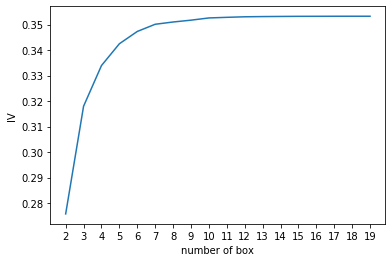

In [74]:
#画图
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

##  用最佳分箱个数分箱，并验证分箱结果

In [76]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [77]:
afterbins = get_bin(num_bins,4)
afterbins

[(21.0, 54.0, 53867, 76260),
 (54.0, 61.0, 15743, 12251),
 (61.0, 74.0, 20344, 7407),
 (74.0, 107.0, 7737, 1399)]

In [78]:
bins_df = get_woe(num_bins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,54.0,53867,76260,130127,0.667291,0.586043,0.551402,0.783625,-0.351466
1,54.0,61.0,15743,12251,27994,0.143553,0.437629,0.161151,0.125888,0.246953
2,61.0,74.0,20344,7407,27751,0.142307,0.266909,0.208248,0.076112,1.006525
3,74.0,107.0,7737,1399,9136,0.046849,0.153130,0.079199,0.014376,1.706421


## 将选取最佳分箱个数的过程包装为函数

In [104]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
   自动最优分箱函数，基于卡方检验的分箱
   参数：
   DF: 需要输入的数据
   X: 需要分箱的列名
   Y: 分箱数据对应的标签 Y 列名
   n: 保留分箱个数
   q: 初始分箱的个数
   graph: 是否要画出IV图像
   区间为前开后闭 (]
   """    
    
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
            
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    
    IV = []
    axisx = []
    bins_df=pd.DataFrame(get_woe(num_bins))
    
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df=pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:    
        plt.figure()
        plt.plot(axisx,IV) 
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
        
    return bins_df

In [100]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

##  对所有特征进行分箱选择

RevolvingUtilizationOfUnsecuredLines


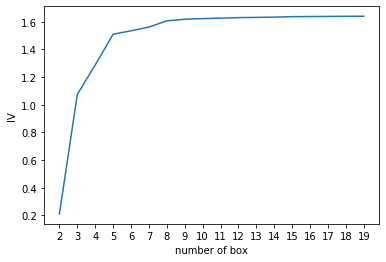

age


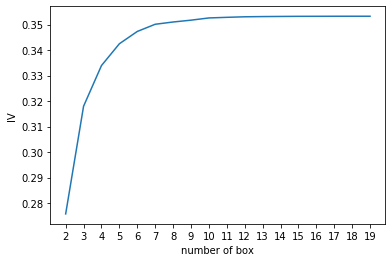

NumberOfTime30-59DaysPastDueNotWorse


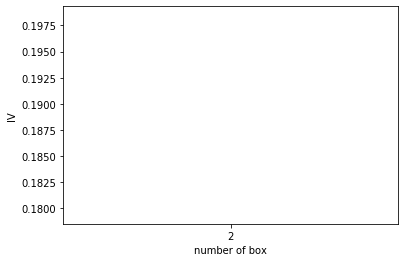

DebtRatio


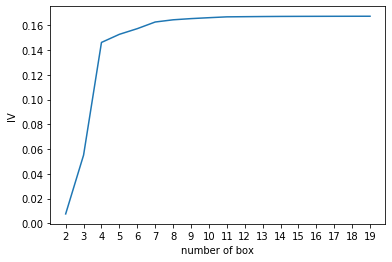

MonthlyIncome


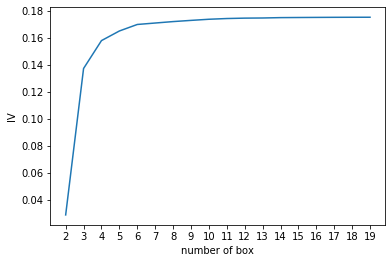

NumberOfOpenCreditLinesAndLoans


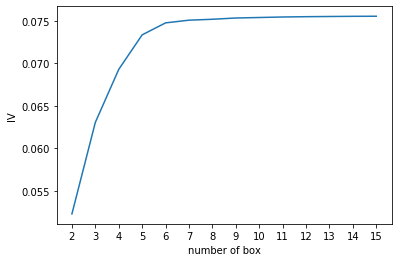

NumberOfTimes90DaysLate


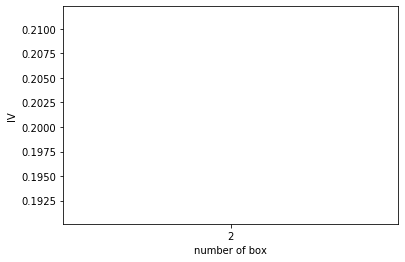

NumberRealEstateLoansOrLines


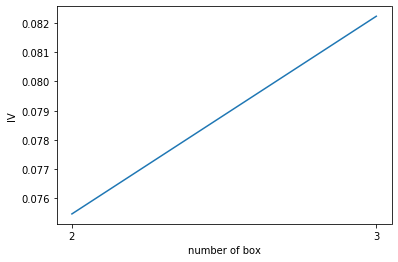

NumberOfTime60-89DaysPastDueNotWorse


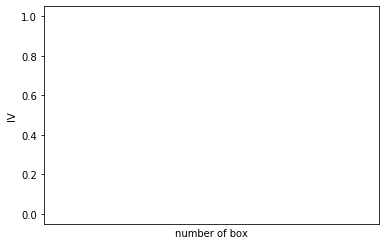

NumberOfDependents


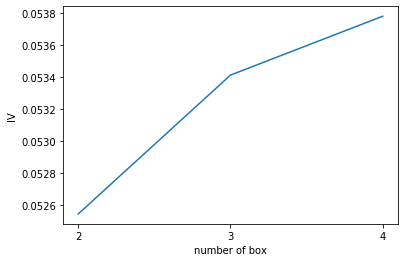

In [105]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

我们发现，不是所有的特征都可以使用这个分箱函数，比如说有的特征，像家人数量，就无法分出20组。于是我们
将可以分箱的特征放出来单独分组，不能自动分箱的变量自己观察然后手写

In [130]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                 "age":5,
                 "DebtRatio":4,
                 "MonthlyIncome":3,
                 "NumberOfOpenCreditLinesAndLoans":5}

In [131]:
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]}

In [132]:
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [133]:
bins_of_col = {}

In [134]:
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [135]:
#合并手动分箱数据    
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.098999107,
  0.29776791844458217,
  0.46488420639058853,
  0.9822320020385585,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017433677062800444,
  0.5032098689315212,
  1.4722640672420035,
  inf],
 'MonthlyIncome': [-inf, 0.10898154685766255, 5594.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

# 计算各箱的WOE并映射到数据中

我们现在已经有了我们的箱子，接下来我们要做的是计算各箱的WOE，并且把WOE替换到我们的原始数据
model_data中，因为我们将使用WOE覆盖后的数据来建模，我们希望获取的是”各个箱”的分类结果，即评分卡上
各个评分项目的分类结果。

In [115]:
data = model_data.copy()
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(48.5, 58.757]"
1,63,0,"(58.757, 64.0]"
2,39,1,"(-inf, 48.5]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(48.5, 58.757]"
...,...,...,...
195003,32,1,"(-inf, 48.5]"
195004,50,1,"(48.5, 58.757]"
195005,46,1,"(-inf, 48.5]"
195006,64,0,"(58.757, 64.0]"


In [117]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut             SeriousDlqin2yrs
(-inf, 48.5]    1                   59261
                0                   39558
(48.5, 58.757]  1                   24457
                0                   23469
(58.757, 64.0]  0                   13551
                1                    7996
(64.0, 74.0]    0                   13376
                1                    4204
(74.0, inf]     0                    7737
                1                    1399
Name: SeriousDlqin2yrs, dtype: int64

In [118]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39558,59261,-0.408019
"(48.5, 58.757]",23469,24457,-0.045072
"(58.757, 64.0]",13551,7996,0.523683
"(64.0, 74.0]",13376,4204,1.153590
"(74.0, inf]",7737,1399,1.706421


把以上过程包装成函数：

In [119]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [136]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.098999107,
  0.29776791844458217,
  0.46488420639058853,
  0.9822320020385585,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017433677062800444,
  0.5032098689315212,
  1.4722640672420035,
  inf],
 'MonthlyIncome': [-inf, 0.10898154685766255, 5594.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [137]:
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.199374
 (0.099, 0.298]    0.669429
 (0.298, 0.465]   -0.129018
 (0.465, 0.982]   -1.073125
 (0.982, 1.0]     -0.485517
 (1.0, inf]       -2.026189
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.524159
 (36.0, 54.0]   -0.277399
 (54.0, 61.0]    0.246953
 (61.0, 74.0]    1.006525
 (74.0, inf]     1.706421
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0174]     1.511942
 (0.0174, 0.503]   -0.011444
 (0.503, 1.472]    -0.470524
 (1.472, inf]       0.175196
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.109]      1.407776
 (0.109, 5594.0]   -0.236264
 (5594.0, inf]      0.231144
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.858308
 (1.0, 3.0]    -0.330253
 (3.0, 5.0]    -0.051129
 (5.0, 17.0]    0.124055
 (17.0, inf]    0.469871
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352356
 (0.0, 1.0]    -0.871770
 (1.0, 2.0]    -1.378159
 (2.0, inf]    -1.541849
 dtype:

接下来，把所有WOE映射到原始数据中：

In [159]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)

In [139]:
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])

In [160]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

In [161]:
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

In [162]:
#这就是我们的建模数据了
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.199374,-0.277399,-0.011444,-0.236264,-0.051129,0.352356,0.236292,-0.392949,0.123837,0.626400,0
1,0.669429,1.006525,-0.011444,-0.236264,-0.051129,0.352356,0.236292,-0.392949,0.123837,0.626400,0
2,-2.026189,-0.277399,-0.011444,-0.236264,-0.051129,-0.871770,-1.759960,-0.392949,-1.767353,-0.475912,1
3,2.199374,1.006525,-0.470524,-0.236264,0.124055,0.352356,0.236292,0.616253,0.123837,0.626400,0
4,-1.073125,-0.277399,-0.011444,0.231144,0.124055,0.352356,0.236292,0.616253,0.123837,-0.581496,1


# 建模与模型验证

终于弄完了我们的训练集，接下来我们要处理测试集，在已经有分箱的情况下，测试集的处理就非常简单了，我们
只需要将已经计算好的WOE映射到测试集中去就可以了：

In [163]:
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [164]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

0.7881329568297119

In [165]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)

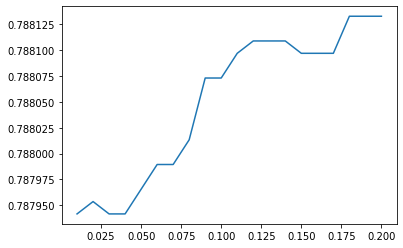

In [166]:
score = []
for i in c_2: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

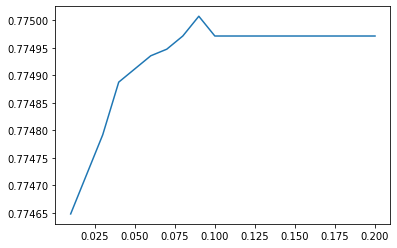

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7739063846080214


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7744089212214033


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7753661338183211


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.774959318464631


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7749712836220924
0.7749712836220924


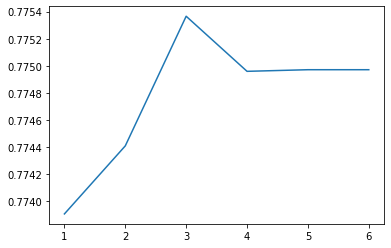

In [154]:
lr.n_iter_
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.08,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [167]:
import scikitplot as skplt

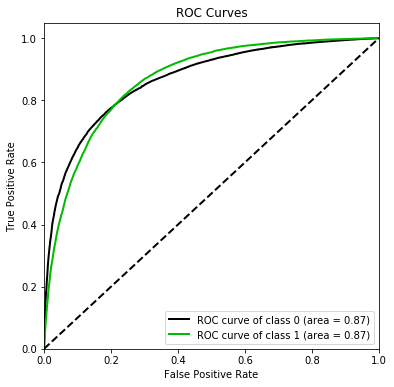

In [168]:
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)

# 制作评分卡

In [169]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)

In [170]:
base_score = A - B*lr.intercept_
base_score

array([481.97416918])

In [171]:
lr.coef_

array([[-0.75427953, -0.27494016, -0.70198876, -0.52105461, -0.2538369 ,
        -0.55184446, -0.57197613, -0.89430492, -0.27852188, -0.81662989]])

In [172]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999,"(52.0, 54.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830,"(31.0, 34.0]"
195004,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000,"(48.0, 50.0]"
195005,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793,"(45.0, 46.0]"
195006,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000,"(61.0, 64.0]"


In [174]:
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

age
(-inf, 36.0]   -11.407739
(36.0, 54.0]    -6.037284
(54.0, 61.0]     5.374651
(61.0, 74.0]    21.905912
(74.0, inf]     37.138378
dtype: float64

In [175]:
file = "ScoreData.csv"
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")